In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Ames_Housing_Remove_Outliers(not_remove_skew_yet).csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
len(df)

2836

## DEAL WITH MISSING DATA

In [5]:
df.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object

In [6]:
df.drop(columns='PID',inplace=True)

# remove PID since it doesnt required in modelling later

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

# total missing data in DF * 100 / numbers of rows

# filtered to only above 0 percent of missing value

Electrical         0.035261
Garage Area        0.035261
Bsmt Half Bath     0.035261
Bsmt Full Bath     0.035261
Total Bsmt SF      0.035261
Bsmt Unf SF        0.035261
BsmtFin SF 1       0.035261
BsmtFin SF 2       0.035261
Garage Cars        0.035261
Mas Vnr Area       0.740480
Mas Vnr Type       0.740480
BsmtFin Type 2     2.715092
Bsmt Cond          2.715092
Bsmt Qual          2.715092
BsmtFin Type 1     2.715092
Bsmt Exposure      2.820874
Garage Type        5.324401
Garage Finish      5.394922
Garage Qual        5.394922
Garage Cond        5.394922
Garage Yr Blt      5.394922
Lot Frontage      16.748942
Fireplace Qu      49.576869
Fence             80.359661
Alley             93.335684
Misc Feature      96.297602
Pool QC           99.682652
dtype: float64

In [8]:
percent_missing.index

Index(['Electrical', 'Garage Area', 'Bsmt Half Bath', 'Bsmt Full Bath',
       'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Garage Cars', 'Mas Vnr Area', 'Mas Vnr Type', 'BsmtFin Type 2',
       'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'Bsmt Exposure',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Garage Yr Blt', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

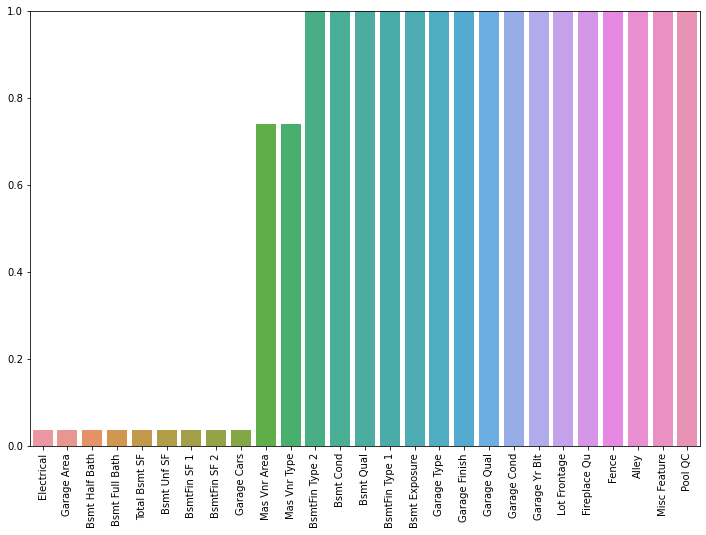

In [9]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

# create a barplot of percentage of missing data
# plt.ylim -- zoom in the graph

In [10]:
df[['Electrical','Garage Area','Bsmt Half Bath','Bsmt Full Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2','Garage Cars']].isnull().sum()

# checking the number of missing value on each features

Electrical        1
Garage Area       1
Bsmt Half Bath    1
Bsmt Full Bath    1
Total Bsmt SF     1
Bsmt Unf SF       1
BsmtFin SF 1      1
BsmtFin SF 2      1
Garage Cars       1
dtype: int64

In [11]:
df.dtypes['Electrical']

# check the data type for the missing data
# example = electrical (object) --- cant be replace with mean(int), can be replace with strings ('None')

dtype('O')

In [12]:
df['Electrical'] 

# consider the data is missing because no NaN value available in the list (notepad)

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
2831    SBrkr
2832    SBrkr
2833    SBrkr
2834    SBrkr
2835    SBrkr
Name: Electrical, Length: 2836, dtype: object

In [13]:
df.loc[df['Electrical'].isnull()] 

# locate the index of missing value

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1528,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [14]:
df.drop([1546],axis=0,inplace=True)

# dropping the missing value

In [15]:
df['Electrical'].isnull().sum()

# check to see if there is still missing data in the features

1

In [16]:
df['Garage Area']

0       528.0
1       730.0
2       312.0
3       522.0
4       482.0
        ...  
2831    588.0
2832    484.0
2833      0.0
2834    418.0
2835    650.0
Name: Garage Area, Length: 2835, dtype: float64

In [17]:
df.loc[df['Garage Area'].isnull()]['Garage Area'] 

2159   NaN
Name: Garage Area, dtype: float64

In [18]:
df['Garage Area']=df['Garage Area'].fillna(0)  

# numerical fill Na with 0
# the house may not have a garage, therefore choose 0 as it is the lowest value

In [19]:
df['Garage Area'].isnull().sum()  # the garage area NaN value had been replace by 0

0

In [20]:
bsmt=['Bsmt Half Bath','Bsmt Full Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2']

# can combine all bsmt features into 1 as it is all float

In [21]:
df.dtypes[bsmt]

Bsmt Half Bath    float64
Bsmt Full Bath    float64
Total Bsmt SF     float64
Bsmt Unf SF       float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
dtype: object

In [22]:
df[bsmt]

,Bsmt Half Bath,Bsmt Full Bath,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2
0,0.0,1.0,1080.0,441.0,639.0,0.0
1,0.0,0.0,882.0,270.0,468.0,144.0
2,0.0,0.0,1329.0,406.0,923.0,0.0
3,0.0,1.0,2110.0,1045.0,1065.0,0.0
4,0.0,0.0,928.0,137.0,791.0,0.0
...,...,...,...,...,...,...
2831,0.0,1.0,1003.0,184.0,819.0,0.0
2832,0.0,1.0,864.0,239.0,301.0,324.0
2833,1.0,0.0,912.0,575.0,337.0,0.0
2834,0.0,1.0,1389.0,195.0,1071.0,123.0


In [23]:
df[bsmt].isnull().sum()

Bsmt Half Bath    1
Bsmt Full Bath    1
Total Bsmt SF     1
Bsmt Unf SF       1
BsmtFin SF 1      1
BsmtFin SF 2      1
dtype: int64

In [24]:
df[bsmt]=df[bsmt].fillna(0)

# fill the whole bsmt missing data with 0

In [25]:
df[bsmt].isnull().sum()

Bsmt Half Bath    0
Bsmt Full Bath    0
Total Bsmt SF     0
Bsmt Unf SF       0
BsmtFin SF 1      0
BsmtFin SF 2      0
dtype: int64

In [26]:
df.loc[df['Garage Cars'].isnull()]['Garage Cars'] 

2159   NaN
Name: Garage Cars, dtype: float64

In [27]:
df['Garage Cars']

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
2831    2.0
2832    2.0
2833    0.0
2834    2.0
2835    3.0
Name: Garage Cars, Length: 2835, dtype: float64

In [28]:
df['Garage Cars']=df['Garage Cars'].fillna(0.0) # fill with 0 value

In [29]:
df['Garage Cars'].isnull().sum()  # no NaN value present in Garage Cars anymore

0

In [30]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical         0.035273
Mas Vnr Type       0.740741
Mas Vnr Area       0.740741
Bsmt Qual          2.716049
Bsmt Cond          2.716049
BsmtFin Type 1     2.716049
BsmtFin Type 2     2.716049
Bsmt Exposure      2.821869
Garage Type        5.326279
Garage Cond        5.396825
Garage Qual        5.396825
Garage Finish      5.396825
Garage Yr Blt      5.396825
Lot Frontage      16.754850
Fireplace Qu      49.594356
Fence             80.352734
Alley             93.333333
Misc Feature      96.296296
Pool QC           99.682540
dtype: float64

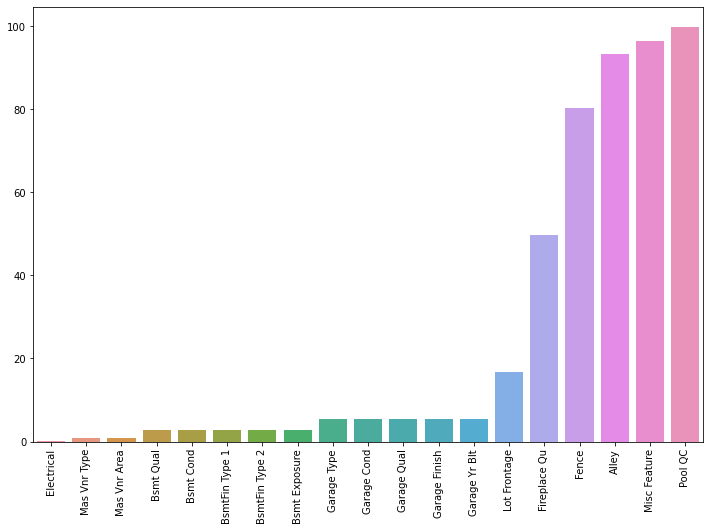

In [31]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [32]:
df[['Mas Vnr Type','Mas Vnr Area']].isnull().sum()

Mas Vnr Type    21
Mas Vnr Area    21
dtype: int64

In [33]:
df.dtypes[['Mas Vnr Type','Mas Vnr Area']]

# Mas Vnr Type - object
# Mas Vnr Area - float

Mas Vnr Type     object
Mas Vnr Area    float64
dtype: object

In [34]:
df.loc[df['Mas Vnr Type'].isnull()] 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
52,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
464,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
496,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
517,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
842,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1063,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1085,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1088,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1093,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1149,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [35]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')

# since it is strings features, fill it with None (from notepad)

In [36]:
df['Mas Vnr Type']

0         Stone
1          None
2       BrkFace
3          None
4          None
         ...   
2831       None
2832       None
2833       None
2834       None
2835    BrkFace
Name: Mas Vnr Type, Length: 2835, dtype: object

In [37]:
df['Mas Vnr Type'].isnull().sum()

0

In [38]:
df["Mas Vnr Area"]

0       112.0
1         0.0
2       108.0
3         0.0
4         0.0
        ...  
2831      0.0
2832      0.0
2833      0.0
2834      0.0
2835     94.0
Name: Mas Vnr Area, Length: 2835, dtype: float64

In [39]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0.0)

In [40]:
df['Mas Vnr Area'].isnull().sum()

0

In [41]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical         0.035273
Bsmt Qual          2.716049
Bsmt Cond          2.716049
BsmtFin Type 1     2.716049
BsmtFin Type 2     2.716049
Bsmt Exposure      2.821869
Garage Type        5.326279
Garage Cond        5.396825
Garage Qual        5.396825
Garage Yr Blt      5.396825
Garage Finish      5.396825
Lot Frontage      16.754850
Fireplace Qu      49.594356
Fence             80.352734
Alley             93.333333
Misc Feature      96.296296
Pool QC           99.682540
dtype: float64

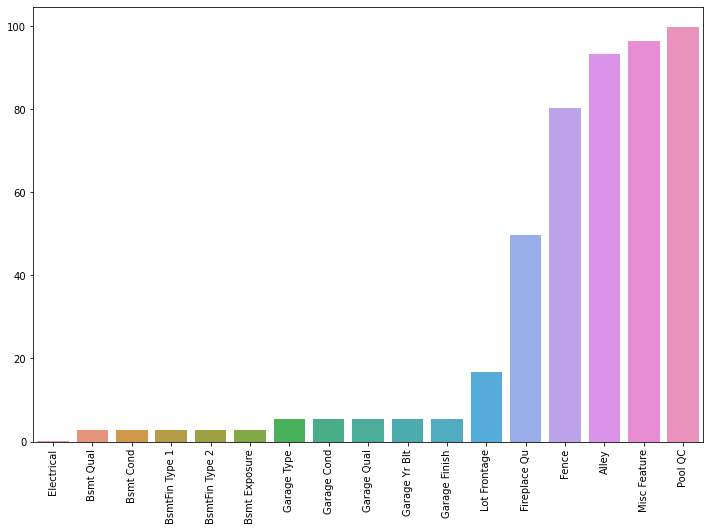

In [42]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [43]:
df[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']].isnull().sum()

Bsmt Qual         77
Bsmt Cond         77
BsmtFin Type 1    77
BsmtFin Type 2    77
Bsmt Exposure     80
dtype: int64

In [44]:
bsmt=['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']

# combine all basement into a variables

In [45]:
df[bsmt]

,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure
0,TA,Gd,BLQ,Unf,Gd
1,TA,TA,Rec,LwQ,No
2,TA,TA,ALQ,Unf,No
3,TA,TA,ALQ,Unf,No
4,Gd,TA,GLQ,Unf,No
...,...,...,...,...,...
2831,TA,TA,GLQ,Unf,Av
2832,Gd,TA,BLQ,ALQ,Av
2833,Gd,TA,GLQ,Unf,Av
2834,Gd,TA,ALQ,LwQ,Av


In [46]:
df.dtypes[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']]

# all the features are object

Bsmt Qual         object
Bsmt Cond         object
BsmtFin Type 1    object
BsmtFin Type 2    object
Bsmt Exposure     object
dtype: object

In [47]:
df[bsmt]=df[bsmt].fillna('NA')

# fill the data in all the features with NA (from notepad)

In [48]:
df[bsmt].isnull().sum() # no missing value anymore

Bsmt Qual         0
Bsmt Cond         0
BsmtFin Type 1    0
BsmtFin Type 2    0
Bsmt Exposure     0
dtype: int64

In [49]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical        0.035273
Garage Type       5.326279
Garage Yr Blt     5.396825
Garage Finish     5.396825
Garage Qual       5.396825
Garage Cond       5.396825
Lot Frontage     16.754850
Fireplace Qu     49.594356
Fence            80.352734
Alley            93.333333
Misc Feature     96.296296
Pool QC          99.682540
dtype: float64

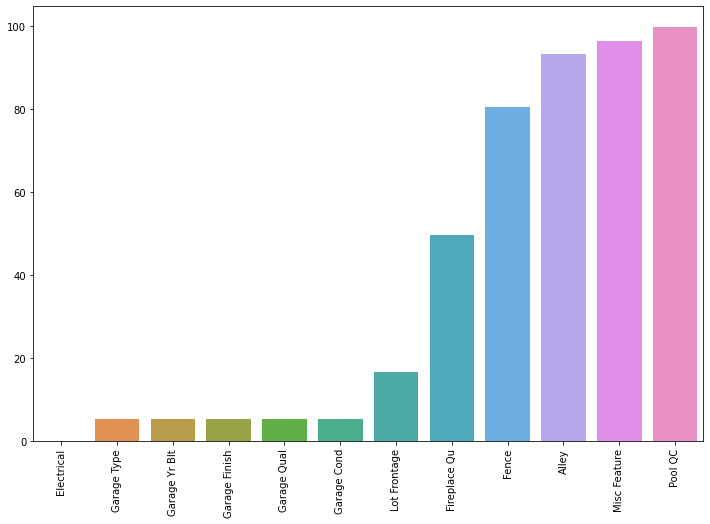

In [50]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [51]:
garage=['Garage Type','Garage Finish','Garage Qual','Garage Cond']

# combine all garage features into one variables

In [52]:
df[garage]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2831,Detchd,Unf,TA,TA
2832,Attchd,Unf,TA,TA
2833,NaN,NaN,NaN,NaN
2834,Attchd,RFn,TA,TA


In [53]:
df[garage].isnull().sum()

Garage Type      151
Garage Finish    153
Garage Qual      153
Garage Cond      153
dtype: int64

In [54]:
df.dtypes[['Garage Type','Garage Finish','Garage Qual','Garage Cond']]

# all the features is object 

Garage Type      object
Garage Finish    object
Garage Qual      object
Garage Cond      object
dtype: object

In [55]:
df[garage]=df[garage].fillna('NA') 

# fill all missing value in the feature with NA (from notepad)

In [56]:
df[garage].isnull().sum()

# no missing value

Garage Type      0
Garage Finish    0
Garage Qual      0
Garage Cond      0
dtype: int64

In [57]:
df['Garage Yr Blt']

0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2831    1984.0
2832    1983.0
2833       NaN
2834    1975.0
2835    1993.0
Name: Garage Yr Blt, Length: 2835, dtype: float64

In [58]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [59]:
df['Garage Yr Blt'].isnull().sum()

0

In [60]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical       0.035273
Lot Frontage    16.754850
Fireplace Qu    49.594356
Fence           80.352734
Alley           93.333333
Misc Feature    96.296296
Pool QC         99.682540
dtype: float64

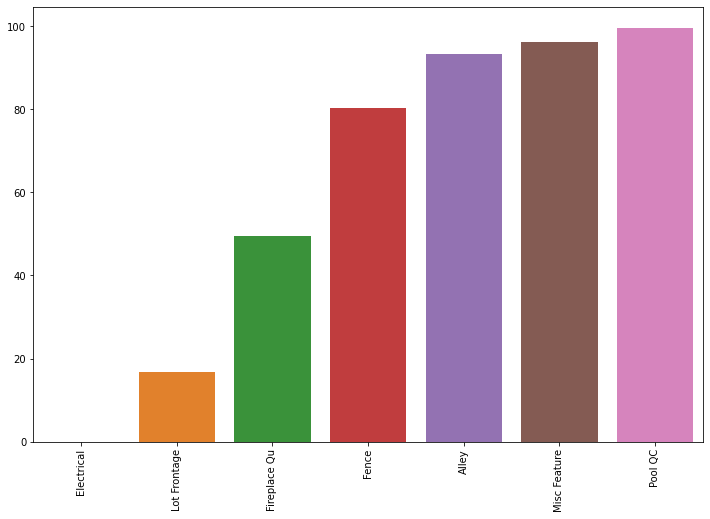

In [61]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [62]:
df['Lot Frontage'].isnull().sum()

475

In [63]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2831     37.0
2832      NaN
2833     62.0
2834     77.0
2835     74.0
Name: Lot Frontage, Length: 2835, dtype: float64

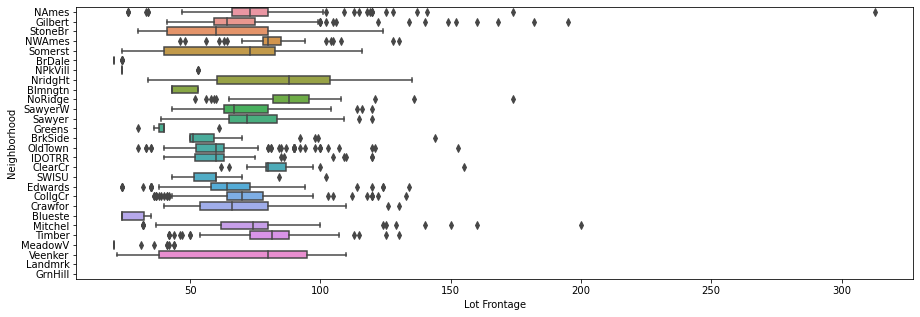

In [64]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df);

# plot the relationship of lot frontage with its respective neighborhood

In [65]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.913978
ClearCr    85.176471
CollgCr    71.220183
Crawfor    69.850000
Edwards    64.391813
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.333333
Landmrk          NaN
MeadowV    25.125000
Mitchel    75.157303
NAmes      74.975741
NPkVill    28.142857
NWAmes     81.535714
NoRidge    89.000000
NridgHt    82.047945
OldTown    61.824324
SWISU      59.046512
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.797468
StoneBr    61.945946
Timber     78.870370
Veenker    70.000000
Name: Lot Frontage, dtype: float64

https://stackoverflow.com/questions/40299055/pandas-how-to-fill-null-values-with-mean-of-a-groupby

In [66]:
df.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.mean()))

# fill the missing data of Lot Frontage will the mean of its respective neighborhood

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2831     37.000000
2832     75.157303
2833     62.000000
2834     77.000000
2835     74.000000
Name: Lot Frontage, Length: 2835, dtype: float64

In [67]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.mean()))

# assign lot frontage to the series of mean value

In [68]:
df['Lot Frontage']

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2831     37.000000
2832     75.157303
2833     62.000000
2834     77.000000
2835     74.000000
Name: Lot Frontage, Length: 2835, dtype: float64

In [69]:
df['Lot Frontage'].isnull().sum()

2

In [70]:
df['Lot Frontage']=df['Lot Frontage'].fillna(df['Lot Frontage'].mean())

# fill the remaining missing value of the features with its mean

In [71]:
df['Lot Frontage'].isnull().sum()

0

In [72]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical       0.035273
Fireplace Qu    49.594356
Fence           80.352734
Alley           93.333333
Misc Feature    96.296296
Pool QC         99.682540
dtype: float64

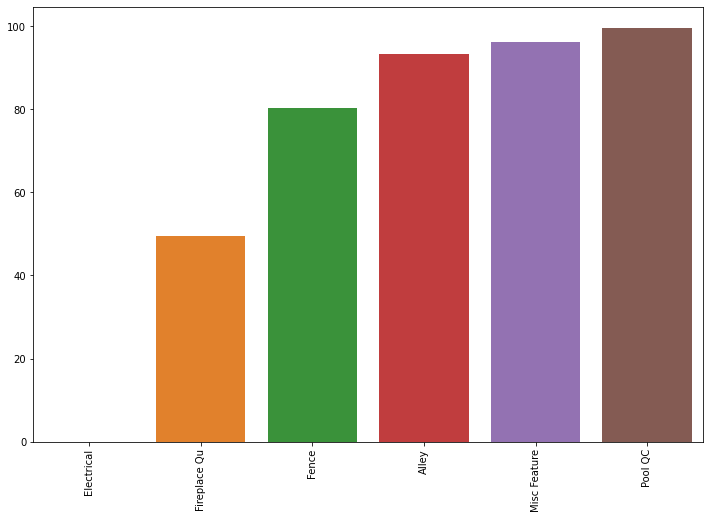

In [73]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [74]:
df['Fireplace Qu'].isnull().sum()

1406

In [75]:
df['Fireplace Qu']

0        Gd
1       NaN
2       NaN
3        TA
4        TA
       ... 
2831    NaN
2832    NaN
2833    NaN
2834     TA
2835     TA
Name: Fireplace Qu, Length: 2835, dtype: object

In [76]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('NA')

# fill the missing data with NA (from notepad)

In [77]:
df['Fireplace Qu'].isnull().sum()

0

In [78]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical       0.035273
Fence           80.352734
Alley           93.333333
Misc Feature    96.296296
Pool QC         99.682540
dtype: float64

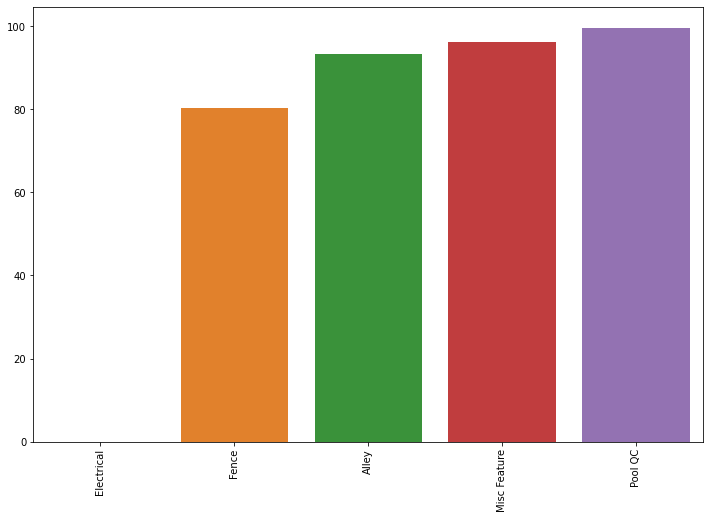

In [79]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [80]:
df=df.drop(columns=['Fence','Alley','Misc Feature','Pool QC'])

# since the missing value is over 80 percent of data, better to drop the column as it has less useful data

## EVALUATE AFTER FILL MISSING DATA

In [81]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical    0.035273
dtype: float64

In [82]:
df['Bsmt Qual'].isnull().sum()

0

In [83]:
df['Fireplace Qu'].isnull().sum()

0

In [84]:
df['Garage Type'].isnull().sum()

0

In [85]:
df.info()

# all the missing data in the dataset had been filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 2835
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2835 non-null   int64  
 1   MS Zoning        2835 non-null   object 
 2   Lot Frontage     2835 non-null   float64
 3   Lot Area         2835 non-null   int64  
 4   Street           2835 non-null   object 
 5   Lot Shape        2835 non-null   object 
 6   Land Contour     2835 non-null   object 
 7   Utilities        2835 non-null   object 
 8   Lot Config       2835 non-null   object 
 9   Land Slope       2835 non-null   object 
 10  Neighborhood     2835 non-null   object 
 11  Condition 1      2835 non-null   object 
 12  Condition 2      2835 non-null   object 
 13  Bldg Type        2835 non-null   object 
 14  House Style      2835 non-null   object 
 15  Overall Qual     2835 non-null   int64  
 16  Overall Cond     2835 non-null   int64  
 17  Year Built    

## save no missing value data set

In [86]:
df.to_csv('Ames_Housing_No_Missing_Data only.csv',index=False)